In [10]:
import numpy as np
import torch

# Takes two vectors. Keep useRealComp=False to get overlap integral
def getOverlapIntegral(prediction, target, useRealComp=False):
    # Convert to numpy complex format
    shape_half = int(target.shape[1]/2)
    prediction2 = prediction[:,:shape_half].cpu().detach().numpy() + 1j * prediction[:,shape_half:].cpu().detach().numpy()
    target2 = target[:,:shape_half].cpu().detach().numpy() + 1j * target[:,shape_half:].cpu().detach().numpy()
    
    # Calculate error
    num_of_examples = target2.shape[0]
    error=torch.zeros(num_of_examples)
    for i in range(num_of_examples):
        error1 = np.vdot(prediction2[i, :], target2[i, :]) # vdot takes care of conjugating automatically.
        if useRealComp:
            error1 = np.real(error1)
        else: 
            error1 = np.absolute(error1)
        error[i] = torch.tensor(error1)
    return error

a normalized =  tensor([[0.0442, 0.4424, 0.4424, 0.0885, 0.3981, 0.4424, 0.4424, 0.2212]])
b normalized =  tensor([[0.1081, 0.4867, 0.4867, 0.1622, 0.0541, 0.4867, 0.4867, 0.1081]])
overlap integral a,b =  0.9281564950942993


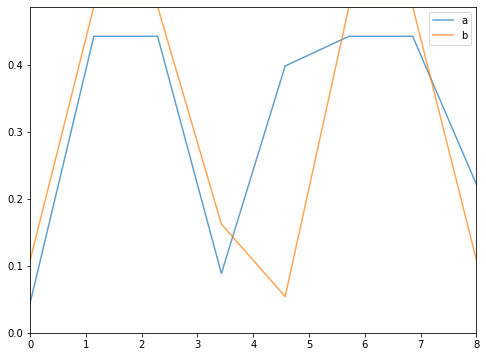

In [16]:
%matplotlib inline

#imports
import torch
import numpy as np

# Create figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
line, = ax.plot([], alpha=0.7)
line2, = ax.plot([], alpha=0.7)

# create tensors
# For each tensor, the first half is the real vector, and the second half is the imaginary part
a=torch.tensor([[0.1,1.,1.,0.2,      0.9,1.,1.,0.5]])
a_opposite=torch.tensor([[1.,0.,0.,1.,      1.,0.,0.,1.]])
b=torch.tensor([[0.2,.9,.9,0.3,    0.1,.9,.9,0.2]])

# normalize the vectors
a=a/torch.norm(a)
b=b/torch.norm(b)

# Plot. Again, left half is real value. Right half is imaginary
# Remember: The x-axis is discrete.
num_columns_per_vector = int(a[0].shape[0])
x = np.linspace(0, num_columns_per_vector, num_columns_per_vector)
ax.set_xlim(0, num_columns_per_vector)
y_max = torch.max(torch.cat((a, b)))
ax.set_ylim(0, y_max.item())
y1 = a.detach().numpy()
y2 = b.detach().numpy()
line.set_label('a')
line2.set_label('b')
line.set_data((x, y1))
line2.set_data((x, y2))
ax.legend()
fig.show()

print('a normalized = ', a)
print('b normalized = ', b)
print('overlap integral a,b = ', getOverlapIntegral(b,a).item())

In [17]:
print('overlap integral a,a = ', getOverlapIntegral(a,a).item()) # should be 1

overlap integral a,a =  1.0


In [18]:
print('overlap integral a,a_opposite = ', getOverlapIntegral(a,a_opposite).item()) # should be 0

overlap integral a,a_opposite =  0.8957390189170837
